### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [57]:
import pandas as pd

h_df = pd.read_csv('./datasets/heart.csv')
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
h_df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [59]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [60]:
h_df[h_df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [61]:
h_df = h_df.drop_duplicates()
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [62]:
h_df.reset_index(drop=True, inplace=True)
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = h_df.corr()

Text(0.5, 1.0, 'Correlation')

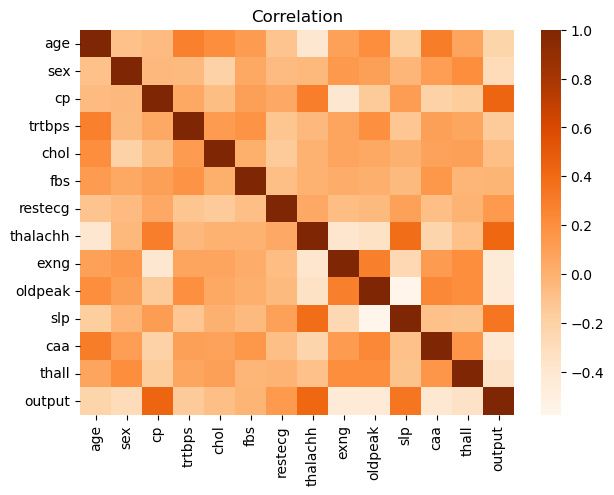

In [64]:
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(corr, cmap='Oranges')
heatmap.set_title('Correlation')

In [65]:
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [68]:
corr[['output']].sort_values(by='output', ascending=False)[1:]

,output
cp,0.432080
thalachh,0.419955
slp,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trtbps,-0.146269
age,-0.221476
sex,-0.283609
thall,-0.343101


In [67]:
h_df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [69]:
under_h_df = h_df.copy()

In [70]:
from sklearn.preprocessing import StandardScaler

features = under_h_df.iloc[:, :-1]

std= StandardScaler()
std_features = std.fit_transform(features)

std_under_h_df = pd.DataFrame(std_features, columns=features.columns)
std_under_h_df['output'] = under_h_df.output
std_under_h_df.shape

(302, 14)

### 이상치 제거
0과 1 같은 범주형 데이터는 이상치 제거하면 안됨.

In [71]:
output1 = h_df[h_df.output == 1].sample(138, random_state=124)
output0 = h_df[h_df.output == 0]

under_h_df = pd.concat([output1, output0]).reset_index(drop=True)

In [72]:
columns = ['thalachh', 'oldpeak', 'slp']

for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 12건
oldpeak: 17건
slp: 21건


전체 데이터에 대해서는 표준화를 진행  
개별 데이터에 대해서는 로그화를 진행

In [73]:
columns = ['thalachh', 'oldpeak', 'slp']

for column in columns:
    std_under_h_df.drop(
        std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index,
        axis=0,
        inplace=True
    )

In [74]:
columns = ['thalachh', 'oldpeak', 'slp']

for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 0건
oldpeak: 0건
slp: 0건


각 hist로 분포 확인
1. 분포 이상치 언더샘플링화
> 타겟 : oldpeak
2. 로그 스케일링 진행
> 분포가 치우쳐져 있는 값에 대해 로그 스케일링 진행

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

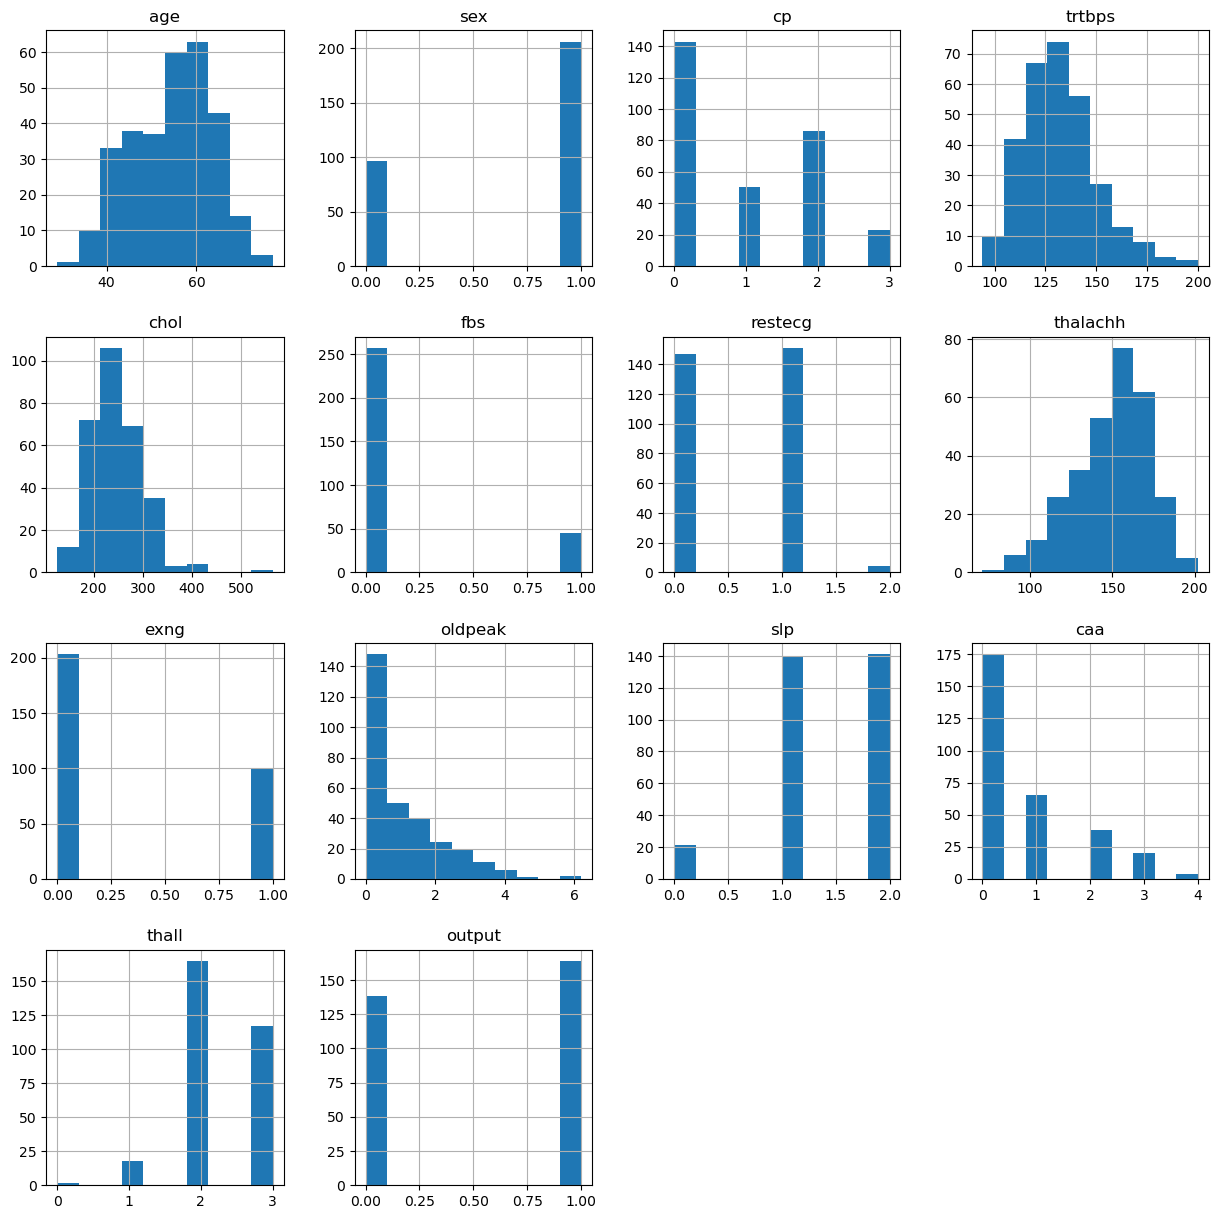

In [75]:
h_df.hist(figsize=(15,15))

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 파이프 라인으로 구축한 각 파이프의 이름을 먼저 작성하고,
# (_)언더바를 두 번(__) 작성한 뒤 파라미터 이름을 작성한다.
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

# probability를 설정해주어야 확률을 알 수 있음
svc = SVC(probability=True)
# 1. 파이프라인 구축
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc= GridSearchCV(svc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 3. 훈련
g_svc.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [14]:
result_df= pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'][0])
display(result_df)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.543570,45
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.543570,45
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.543570,45
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.543570,45
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.543570,45
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.576852,42
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.821553,11
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.543570,45
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.821553,11


In [19]:
result_df['rank_test_score'].sort_values()

30     1
26     1
28     1
61     1
32     1
      ..
25    45
31    45
33    45
11    45
71    45
Name: rank_test_score, Length: 72, dtype: int32

In [25]:
print(result_df['params'][30])
print(result_df['params'][26])
print(result_df['params'][28])
print(result_df['params'][61])
print(result_df['params'][32])

{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}
{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
{'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel': 'linear'}


30, 26, 28까지는 linear가 높지만, 61은 rbf 모델이었음.

분류는 선형을 나타냄. C값은 0.1일때 인것을 알 수 있음

In [15]:
svc = g_svc.best_estimator_
prediction= svc.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='micro')
    recall = recall_score(y_test , prediction, average='micro')
    f1 = f1_score(y_test, prediction, average='micro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

오차 행렬
[[20  8]
 [ 3 30]]
정확도: 0.8197, 정밀도: 0.8197, 재현율: 0.8197, F1: 0.8197
################################################################################


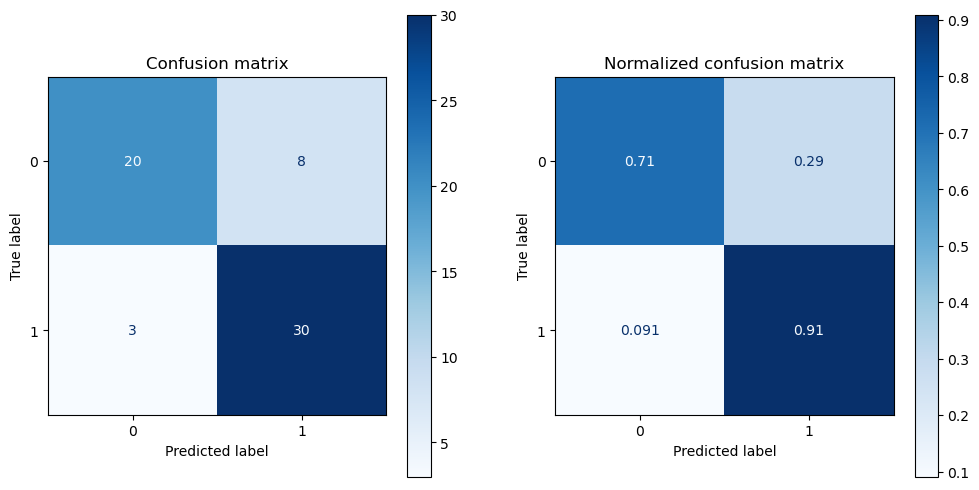

In [17]:
get_evaluation(y_test, prediction, svc, X_test)

In [31]:
svc = SVC(C=0.1, kernel= 'linear',probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', probability=True))])

오차 행렬
[[20  8]
 [ 3 30]]
정확도: 0.8197, 정밀도: 0.8197, 재현율: 0.8197, F1: 0.8197
################################################################################


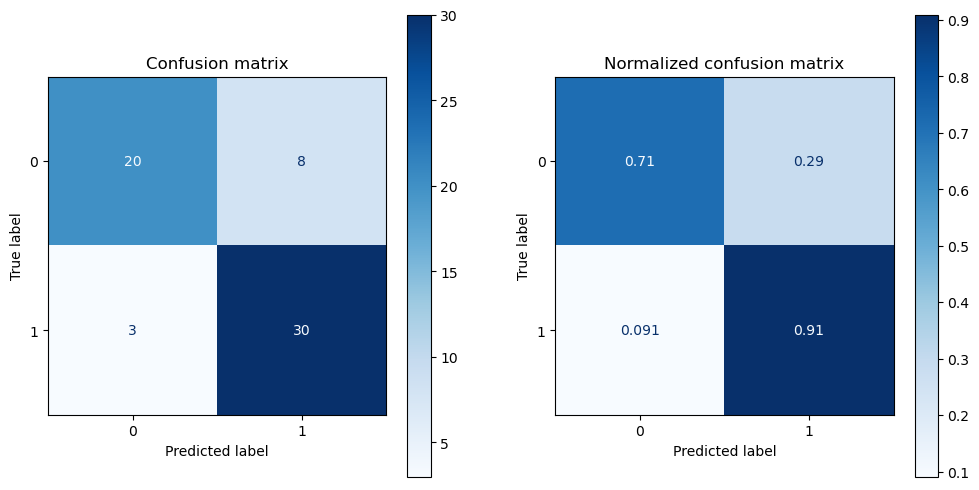

In [32]:
prediction = svc_pipe.predict(X_test.values)
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

In [34]:
svc = SVC(C=100,gamma=0.001, probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.001, probability=True))])

오차 행렬
[[21  7]
 [ 3 30]]
정확도: 0.8361, 정밀도: 0.8361, 재현율: 0.8361, F1: 0.8361
################################################################################


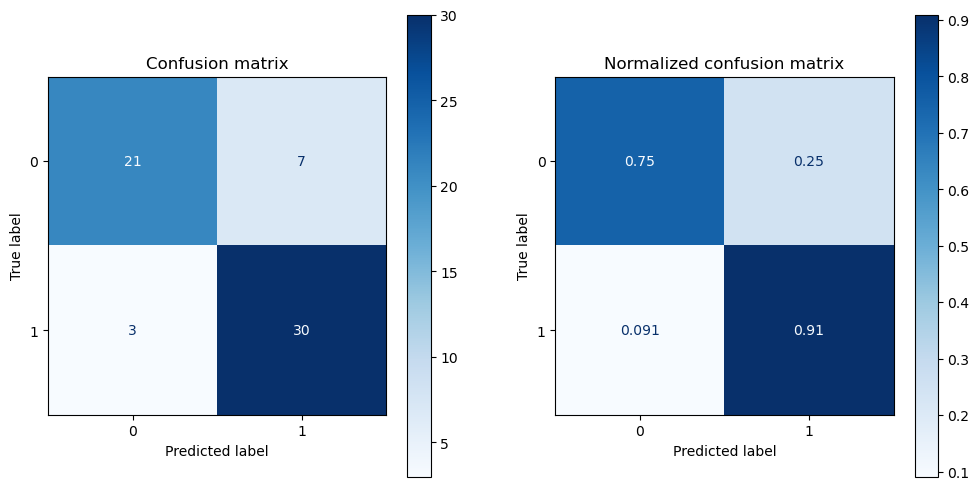

In [35]:
prediction = svc_pipe.predict(X_test.values)
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

In [76]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: 

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)